#Descision tree regresion
CART
CLASSIFIACTION TREE
REGRESSION TREE


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

from joblib import dump,load
import plotly.express as px

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [4]:
#first visulaisation
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price')

In [5]:
X =df[['Mendacium','Depth']]
y =df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [6]:
###algo insatance and fit
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [7]:
print("score:",model.score(xtest,ytest) *100)
pred=model.predict(X)
print("mse",mean_squared_error(y,pred))
print("mse",mean_absolute_error(y,pred))



score: 92.10781140587947
mse 16.42628057720544
mse 1.44635225965


<AxesSubplot:ylabel='Density'>

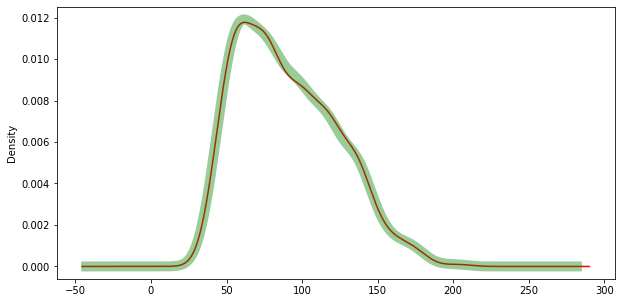

In [8]:
df['p1']= pred
ax=df['Price'].plot(kind='kde', color='red',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,color='green',alpha=.4,linewidth=10)

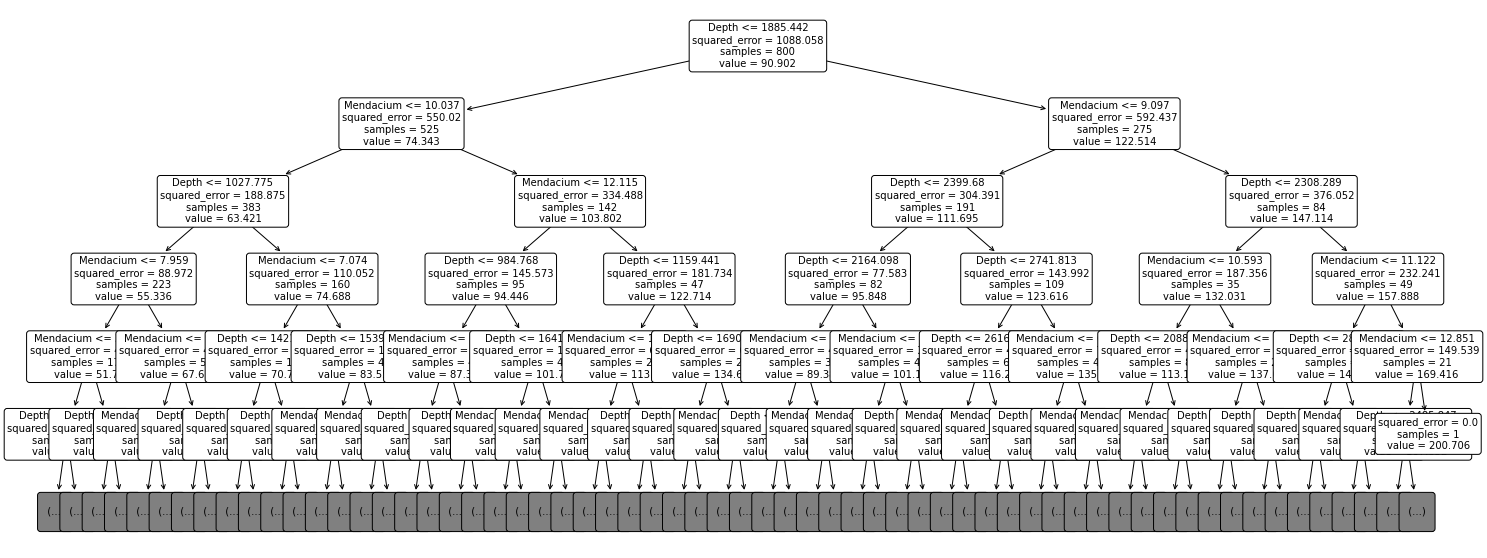

In [9]:
plt.figure(figsize=(25,10))
plot_tree(model,max_depth=5,fontsize=10,feature_names=['Mendacium','Depth'],rounded=True)
plt.show()

In [10]:
dump(model,'new_basic_oil')

['new_basic_oil']